### Control Lab equipment remotely
* Sun EC13 temperature chamber
* CAEN N6724 digitizer
* CAEN N14171HV supply

In [1]:
# setup
import sys
CRANEPATH = '/opt/cranelab/CraneLab-build/'
if sys.path[-1] != CRANEPATH:
    sys.path.append(CRANEPATH)

import numpy as np

import clhvcontrol
import risingsun 
import pyCaenN6725

### Operate the high voltage

In [2]:
# currently the hv is connected via USB
# (will change to ehternet at some point)
HVPORT='/dev/ttyACM0'
LOGLEVEL=30
try:
    hv = clhvcontrol.CAENN1471HV(port=HVPORT,
                                 loglevel=LOGLEVEL,
                                 time_delay=1.0)
except Exception:
    print ('Something went wrong, try executing the cell again!')

100%|██████████| 10/10 [00:00<00:00, 19.64it/s]


In [3]:
#print the set values
for ch in range(4):
    print (f'Current set voltage for ch {ch}: {hv.channels[ch].voltage_as_set}')
    print (f'Current set current for ch {ch}: {hv.channels[ch].current_as_set}')
    print (f'Current measured voltage for ch {ch}: {hv.channels[ch].voltage_as_is}')
    print (f'Current measured current for ch {ch}: {hv.channels[ch].current_as_is}')
    print (f'Current set ramp-down [V/s] for ch {ch}: {hv.channels[ch].ramp_down}')
    print (f'Current set ramp-up [V/s] for ch {ch}: {hv.channels[ch].ramp_up}')

Current set voltage for ch 0: [40.0]
Current set current for ch 0: [3.0]
Current measured voltage for ch 0: [40.4]
Current measured current for ch 0: [0.0]
Current set ramp-down [V/s] for ch 0: [5.0]
Current set ramp-up [V/s] for ch 0: [5.0]
Current set voltage for ch 1: [250.0]
Current set current for ch 1: [3.0]
Current measured voltage for ch 1: [0.0]
Current measured current for ch 1: [0.0]
Current set ramp-down [V/s] for ch 1: [5.0]
Current set ramp-up [V/s] for ch 1: [5.0]
Current set voltage for ch 2: [250.0]
Current set current for ch 2: [3.0]
Current measured voltage for ch 2: [0.0]
Current measured current for ch 2: [0.0]
Current set ramp-down [V/s] for ch 2: [5.0]
Current set ramp-up [V/s] for ch 2: [5.0]
Current set voltage for ch 3: [250.0]
Current set current for ch 3: [3.0]
Current measured voltage for ch 3: [0.0]
Current measured current for ch 3: [0.0]
Current set ramp-down [V/s] for ch 3: [5.0]
Current set ramp-up [V/s] for ch 3: [5.0]


In [11]:
# set the values

#print the set values
for ch in range(4):
    hv.channels[ch].voltage_as_set = 250
    hv.channels[ch].current_as_set = 3.0 # 3 micro amps
    hv.channels[ch].ramp_down = 5
    hv.channels[ch].ramp_up = 5

In [12]:
# do something - activate the power
hv.channel0.activate()


0it [00:00, ?it/s]


In [34]:
# and deactivate
hv.channel0.deactivate()


100%|██████████| 50/50 [00:50<00:00,  1.01s/it]

In [28]:
# leakage current 
volts = np.linspace(0,250,51)
print (volts)
v_s, i_s = hv.channel0.take_iv_curve(volts, time_interval=2)


  0%|          | 0/51 [00:00<?, ?it/s]

[   0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   55.
   60.   65.   70.   75.   80.   85.   90.   95.  100.  105.  110.  115.
  120.  125.  130.  135.  140.  145.  150.  155.  160.  165.  170.  175.
  180.  185.  190.  195.  200.  205.  210.  215.  220.  225.  230.  235.
  240.  245.  250.]



100%|██████████| 51/51 [05:06<00:00,  6.01s/it]

In [29]:
assert len(i_s) == len(v_s)

[None None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None None
 None None None None list([165.4]) None None None None None None None None
 None None None None None None None None]
[[ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.005]
 [ 0.015]
 [ 0.02 ]
 [ 0.025]
 [ 0.025]
 [ 0.035]
 [ 0.035]
 [ 0.045]
 [ 0.005]
 [ 0.01 ]
 [ 0.01 ]
 [ 0.025]
 [ 0.015]
 [ 0.02 ]
 [ 0.02 ]
 [ 0.03 ]
 [ 0.025]
 [ 0.035]
 [ 0.04 ]
 [ 0.045]
 [ 0.055]
 [ 0.11 ]
 [ 0.055]
 [ 0.065]
 [ 0.065]
 [ 0.1  ]
 [ 0.11 ]
 [ 0.13 ]
 [ 0.12 ]
 [ 0.135]
 [ 0.13 ]
 [ 0.14 ]
 [ 0.165]
 [ 0.15 ]
 [ 0.15 ]
 [ 0.16 ]
 [ 0.16 ]
 [ 0.18 ]
 [ 0.19 ]
 [ 0.195]
 [ 0.37 ]
 [ 0.395]
 [ 0.37 ]
 [ 0.33 ]
 [ 0.32 ]
 [ 0.335]
 [ 0.31 ]]


ValueError: setting an array element with a sequence.

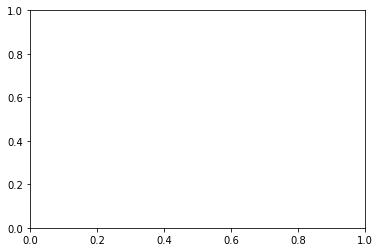

In [30]:
print(v_s)
print(i_s)

import pylab as p
p.scatter(v_s, i_s)

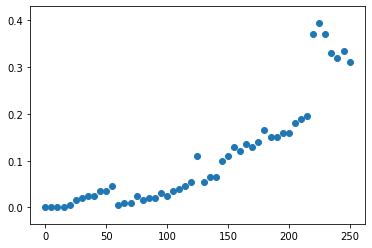

In [32]:
p.scatter(volts, i_s)

In [33]:
hv.channel0.current_as_is

[0.13]

### Operate the SUN EC13 temperature chamber

In [1]:
import time
import numpy as np

import risingsun


SUNPORT = '/dev/ttyUSB0'
sunec = risingsun.chamber.SunChamber(risingsun.chamber.PrologixUsbGPIBController(),
                                     publish=False,
                                     port=SUNPORT)

SUN EC13 chamber reporting status....
Power ON
Last command ok
Time out LED OFF
Not waiting for timeout
Heat output is enabled
Cool output is enabled
Invalid set temperatur
Deviation limit ok
Not currently ramping
Chamber temp > lower limit
Chamber temp < upper limit
Not waiting at a BKPNT
Not in LP run mode
Not in LP remote store mode
Not in local edit LP mode
Not waiting to run LP as TOD
No GPIB bus timeout
Not in local keyboard lockout mode
System self test was ok
----------------------------------


In [10]:
# power it on

sunec.ON

Turning on chamber...


In [55]:
#status 
sunec.show_status()

SUN EC13 chamber reporting status....
Power ON
Last command ok
Time out LED OFF
Not waiting for timeout
Heat output is enabled
Cool output is enabled
Invalid set temperatur
Deviation limit ok
Not currently ramping
Chamber temp > lower limit
Chamber temp < upper limit
Not waiting at a BKPNT
Not in LP run mode
Not in LP remote store mode
Not in local edit LP mode
Not waiting to run LP as TOD
No GPIB bus timeout
Not in local keyboard lockout mode
System self test was ok
----------------------------------


In [51]:
# set cooldown/warm up rate to 3deg/min
sunec.rate_as_set = 3

In [14]:
%matplotlib notebook
# readout


import pylab as p
try:
    p.style.use('risingsun')
    p.style.use('HErmes-present')
except Exception as e:
    print(e)
    print('Style files not found, no worries...')
    
def monitor_internal_temperatures():
    fig = p.figure(dpi=150)
    ax = fig.gca()
    ax.set_xlabel("time since start [s]")
    ax.set_ylabel("temperature $^{\circ}$C")
    p.ion()
    line_plot = ax.plot(range(0), color="red", lw=3)[0]


    start_time = time.monotonic()

    fig.show()
    fig.canvas.draw()

    while True:
        sec = time.monotonic() - start_time
        temp = sunec.get_temperature()
        secs, temps = line_plot.get_data()
        secs = np.append(secs,sec)
        temps = np.append(temps,temp)
        line_plot.set_ydata(temps)
        line_plot.set_xdata(secs)
        datamin = min(temps)
        datamax = max(temps)
        xmin = min(secs)
        xmax = max(secs)
        #print(secs)
        if len(secs) == 1:
            continue
    
        # avoid matplotlib warning
        if abs(datamin - datamax) < 1:
            datamin -= 1
            datamax += 1

        if abs(xmax - xmin) < 1:
            xmin -= 1
            xmax += 1

        # update the plot
        ax.set_xlim(xmin=xmin, xmax=xmax)
        ax.set_ylim(ymin=datamin, ymax=datamax)

    
        fig.canvas.draw()
        time.sleep(5)


<IPython.core.display.Javascript object>


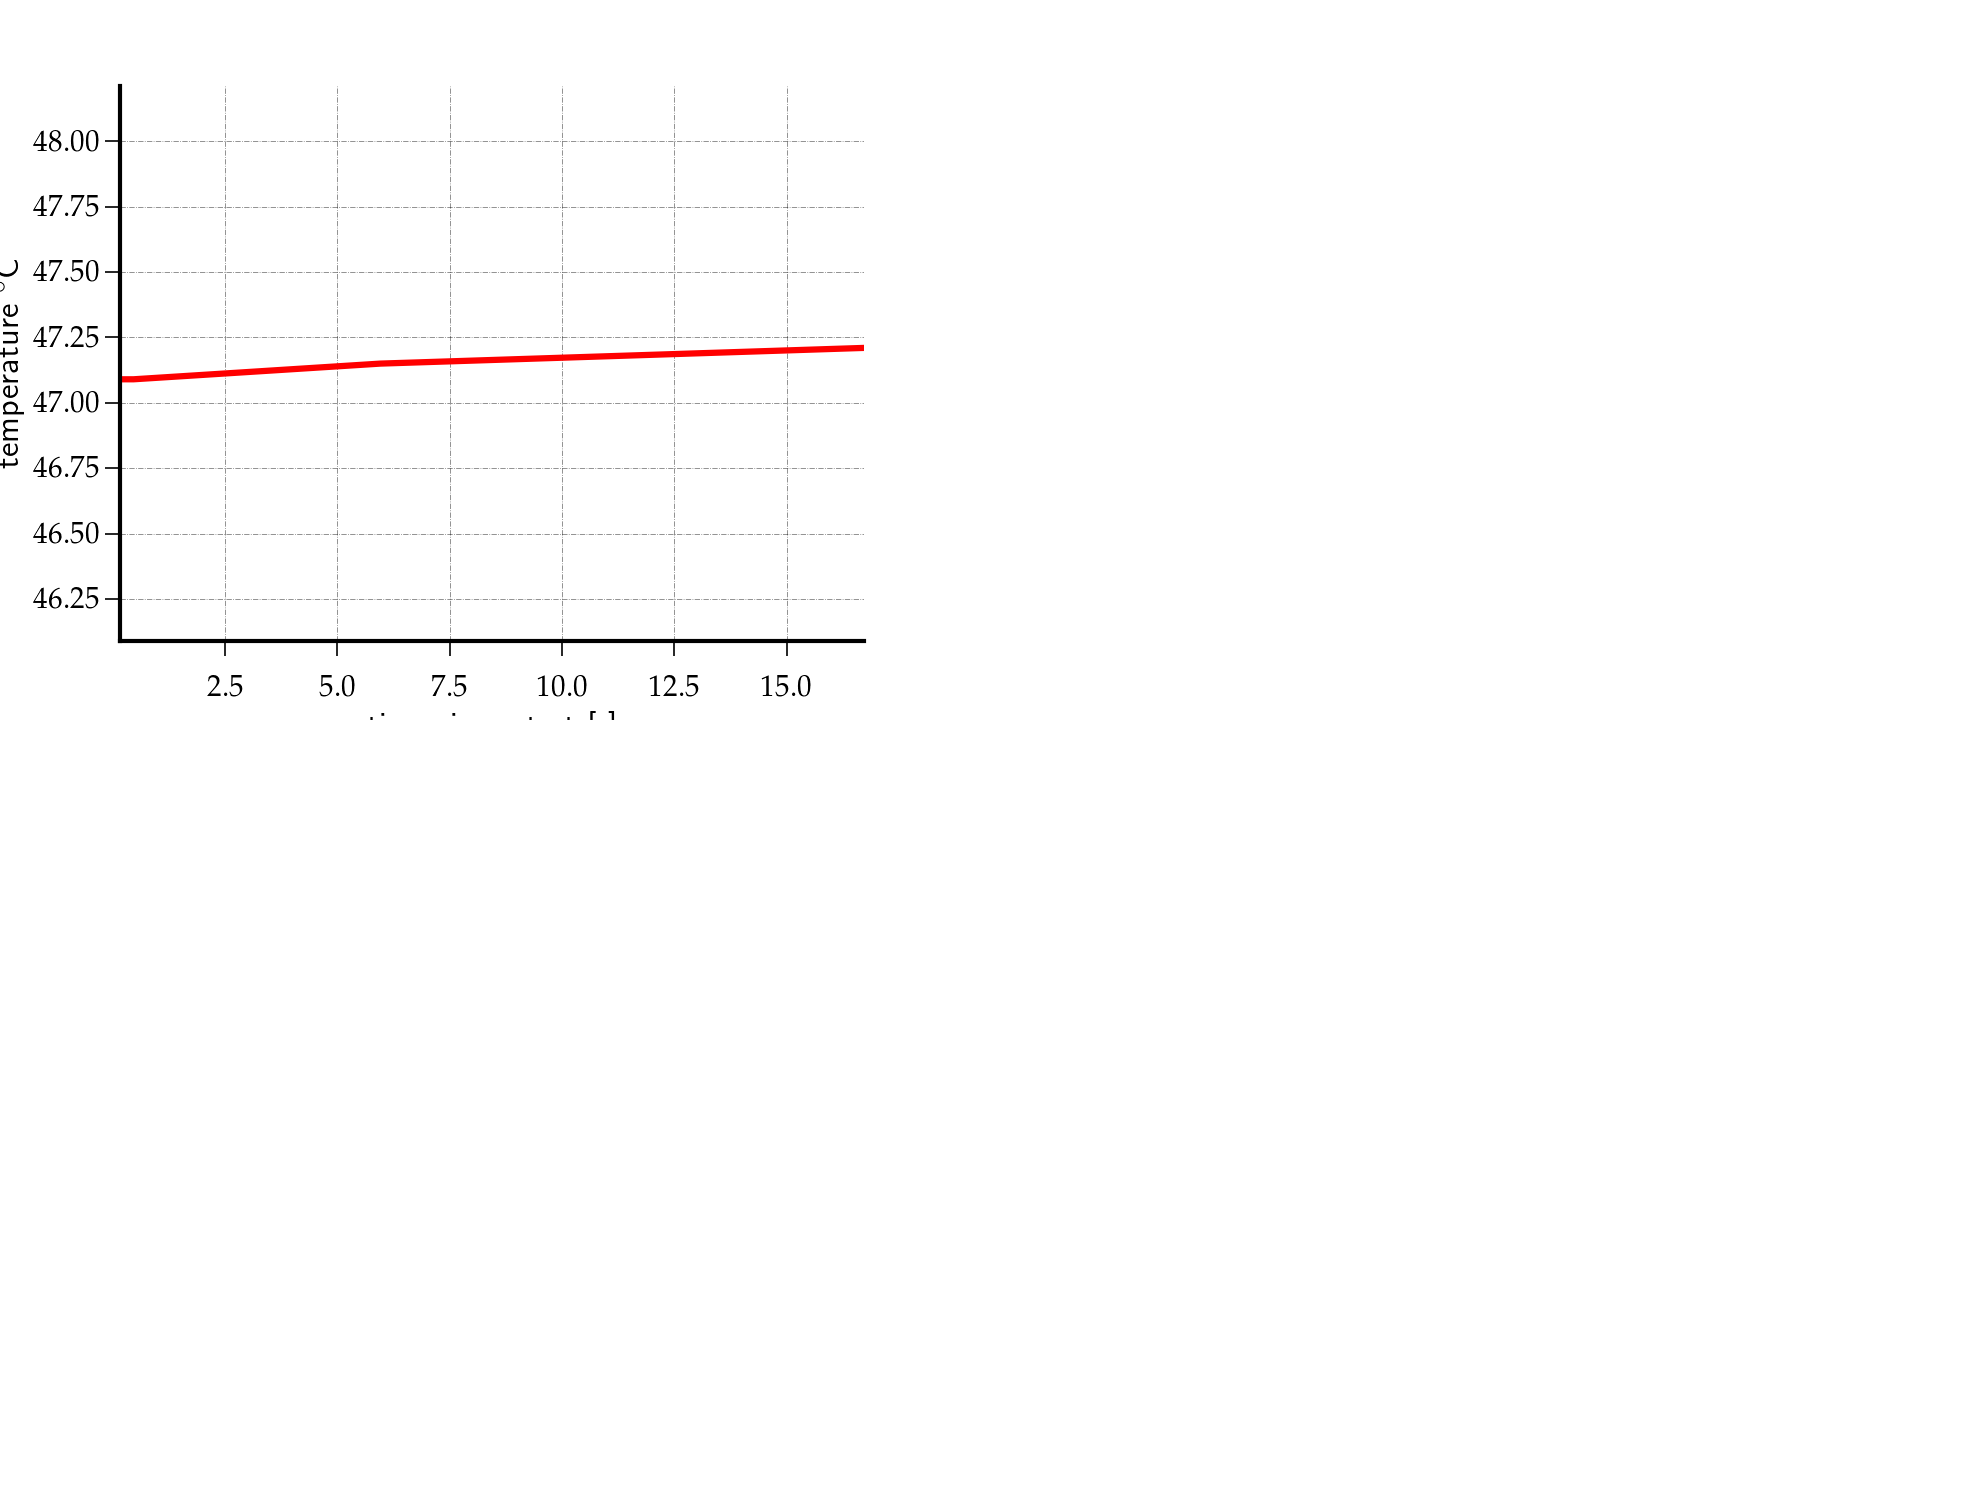

KeyboardInterrupt: 

In [15]:
monitor_internal_temperatures()

In [ ]:
# cooldown
sunec.rate_as_set = 3
sunec.temperature_as_set = -45
monitor_internal_temperatures()

In [ ]:
# warmup
#FIMXE: close the valve
sunec.rate_as_set = 3
sunec.open_dry_nitrogen_valve()
time.sleep(10)
sunec.temperature_as_set = 30
monitor_internal_temperatures()


In [7]:
# turn it off

sunec.OFF

Turning chamber off...


In [ ]:
sunec.open_dry_nitrogen_valve()

In [ ]:
sunec.close_dry_nitrogen_valve()